## - To compare multiple files for files under a same directory

In [1]:
BaseDir    = '/Users/ranchu/FLASHOR/Movies_n_Data/dele_1D_2S/Chimera_S25_100ms_Fluid/'
ProblemDir = 'CS25100ms_BTr_staticFluid_CB/' # will be used as title
OptionDir  = '16X16E_1_30_LS220' 

FileIndex       = [0,100,500] # need to be a list
nSpecies        = 2

# default
FileNameBase  = '/deleptonizationwave_hdf5_chk_'
Directory     = [BaseDir + ProblemDir + OptionDir] # can be different for a list
Directory     = Directory * len(FileIndex)

## Load library, search and read-in data ...

In [2]:
import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import flashytlib.io as fyio
import flashytlib.io_basis as fyiobasis
import numpy as np

# assemble filename
[fnum, FullFileNames] \
= fyiobasis.IO_AssembleFileName(Directory,FileNameBase,FileIndex)
# read data
[Times, Energy, Radius, ZerothMoment, FirstMoment, NumberDensity, EnergyDensity, \
            FluxDensity, AverageEnergy, AverageFluxFactor, Luminosity ] \
= fyio.IO_GetMoments_n_ComputeMeanVars(FullFileNames,Directory, nSpecies)

shape Times  [nfum] (3,)
shape Energy [nfum,nE] (3, 16)
shape Radius [nfum,nR] (3, 256)
shape NumbDe [nfum,nS,nR] (3, 2, 256)
shape Moment [nfum,nS,nR,nE] (3, 2, 256, 16)


# Making plots ...
## Rho-T-Ye plot:

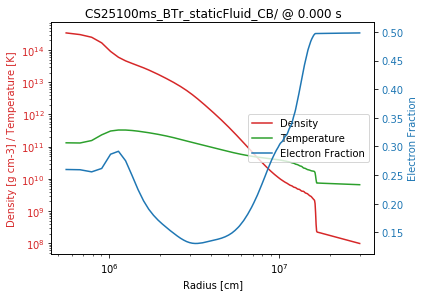

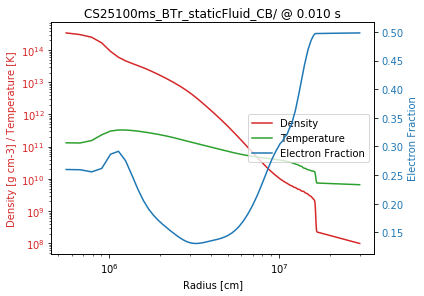

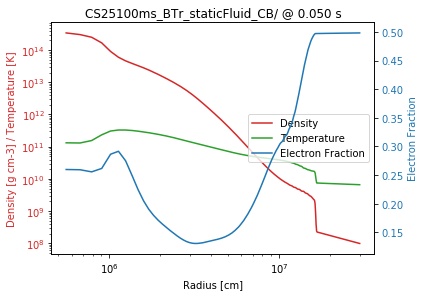

In [3]:
%matplotlib inline
import flashytlib.plot as fyplt

for ifi in range(fnum):
    fyplt.plt_1D_Eos(FullFileNames[ifi],\
                 optional_title=ProblemDir+' @ {:.3f} s'.format(Times[ifi]))

## Luminosity:

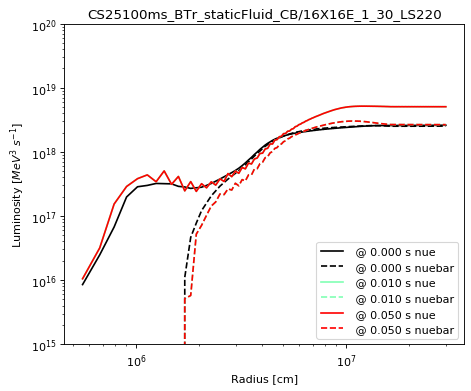

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

labels = ['nue   ','nuebar']
LineType     = ['solid','dashed']
colors = cm.rainbow(np.linspace(0, 1, fnum)) # color for times/file
colors[0] = [0,0,0,1] # black the initial

fig, ax1 = plt.subplots(num=None, figsize=(6, 5), dpi=80, facecolor='w', edgecolor='k')
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel(r'Luminosity [$MeV^3$ $s^{-1}$]')

for ifile in range(fnum):
    for iS in range(nSpecies):
        ax1.plot(Radius[ifile],Luminosity[ifile][iS],\
                 linestyle=LineType[iS],color=colors[ifile],\
                 label=' @ {:.3f} s '.format(Times[ifile])+labels[iS])
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([1.0e15, 1.0e20])
ax1.tick_params(axis='y')
ax1.set_title(ProblemDir+OptionDir)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='lower right')

plt.show()


### Relative difference in luminosity assuming same spatial points:

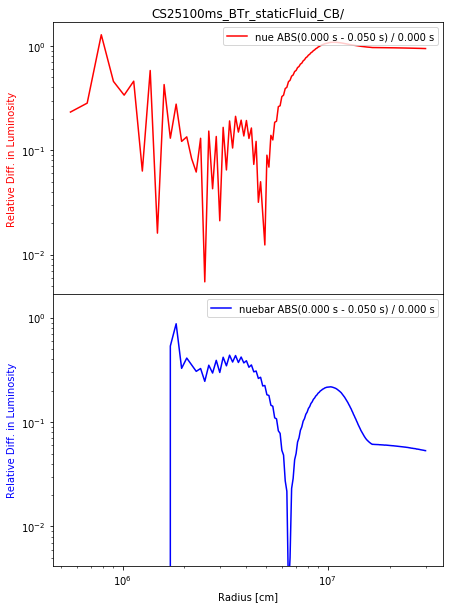

In [5]:
base_ifile  = 0
comp_ifile  = fnum-1

labels  = ['nue','nuebar']
colors  = ['red','blue']
RelativeDiff_Luminosity = ['?']*nSpecies

for iS in range(nSpecies):
    RelativeDiff_Luminosity[iS]= \
    abs(Luminosity[base_ifile][iS]-Luminosity[comp_ifile][iS])\
    /Luminosity[base_ifile][iS]

fig, axs = plt.subplots(2, sharex=True, sharey=True, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))

title = ProblemDir

for i in range(nSpecies):
    leg =labels[i] + ' ABS('+ '{:.3f} s'.format(Times[base_ifile])\
    +' - '+'{:.3f} s'.format(Times[comp_ifile]) + \
    ') / '+'{:.3f} s'.format(Times[base_ifile])

    axs[i].plot(Radius[base_ifile],RelativeDiff_Luminosity[i],\
                      color=colors[i],label=leg)
    axs[i].set_ylabel('Relative Diff. in Luminosity',color=colors[i])
    axs[i].legend(loc='upper right')
    
axs[1].set_xlabel('Radius [cm]')

axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_title(title)

plt.show()

## Average energy and average flux factor:

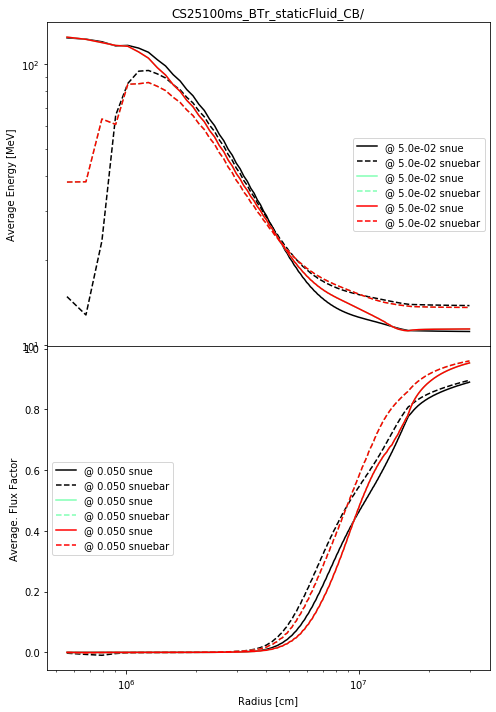

In [11]:
%matplotlib inline 
# notebook or inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

labels = ['nue','nuebar']
LineType     = ['solid','dashed']

# ============ figure 1 =============
colors = cm.rainbow(np.linspace(0, 1, fnum))
colors[0] = [0,0,0,1] # black the initial
LineTypes = ['solid','dashdot', 'dashed','dotted'] # rolling in use

#fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))
# --- Number Density ---
axs[0].set_title(ProblemDir)
axs[1].set_xlabel('Radius [cm]')
axs[0].set_ylabel('Average Energy [MeV]')

for ifi in range(fnum):
    for iS in range(nSpecies):
        axs[0].plot(Radius[ifi],AverageEnergy[ifi][iS], \
                    linestyle=LineType[iS],color=colors[ifi],\
                    label='@ {:.1e} s'.format(Times[ifile])+labels[iS])

axs[0].set_yscale('log')
axs[0].set_xscale('log')

# --- Average Flux Factor ---
axs[1].set_ylabel('Average. Flux Factor')
axs[1].set_yscale('linear')
for ifi in range(fnum):
    for iS in range(nSpecies):
        axs[1].plot(Radius[ifi],AverageFluxFactor[ifi][iS], \
                    linestyle=LineType[iS],color=colors[ifi],\
                    label='@ {:.3f} s'.format(Times[ifile])+labels[iS])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
axs[0].legend(loc='right')
axs[1].legend(loc='center left')
#plt.show()
plt.savefig(Directory[0]+'/IfStationary.png')



### Relative difference in average energy and average flux factor:

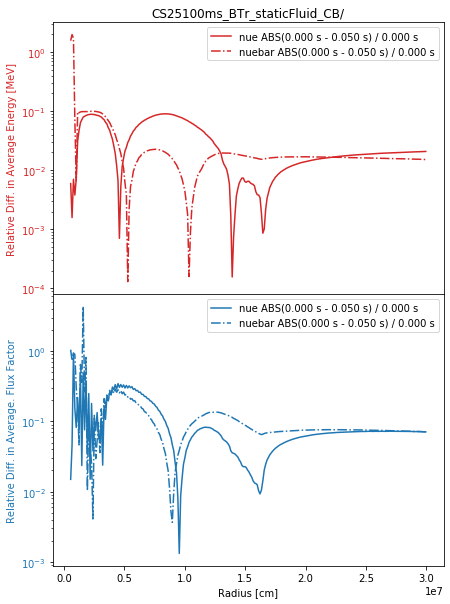

In [13]:
base_i  = 0
comp_i  = fnum-1

RelativeDiff_AverageEnergy = nSpecies * ['?']
RelativeDiff_AverageFluxFactor = nSpecies * ['?']
for iS in range(nSpecies):
    RelativeDiff_AverageEnergy[iS] = \
    abs(AverageEnergy[base_i][iS]-AverageEnergy[comp_i][iS])\
    /AverageEnergy[base_i][iS]
    RelativeDiff_AverageFluxFactor[iS] = \
    abs(AverageFluxFactor[base_i][iS]-AverageFluxFactor[comp_i][iS])\
    /abs(AverageFluxFactor[base_i][iS])

import matplotlib.pyplot as plt

LineType     = ['solid','dashdot', 'dashed','dotted','dashdot']
#fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))

for i in range(nSpecies):
    
    # --- Number Density ---
    color = 'tab:red'
    axs[0].set_xlabel('Radius [cm]')
    axs[0].set_ylabel('Relative Diff. in Average Energy [MeV]',color=color)
    leg =labels[i] + ' ABS('+ '{:.3f} s'.format(Times[base_ifile])\
    +' - '+'{:.3f} s'.format(Times[comp_ifile]) + \
    ') / '+'{:.3f} s'.format(Times[base_ifile])

    axs[0].plot(Radius[base_ifile],RelativeDiff_AverageEnergy[i],\
                    linestyle=LineType[i], color=color,label=leg)
    axs[0].set_yscale('log')
    axs[0].tick_params(axis='y', labelcolor=color)
    
    # --- Average Flux Factor ---

    color = 'tab:blue'
    axs[1].set_ylabel('Relative Diff. in Average. Flux Factor', color=color)
    axs[1].plot(Radius[base_ifile],RelativeDiff_AverageFluxFactor[i],\
                    linestyle=LineType[i], color=color,label=leg)
    axs[1].set_yscale('log')    
    axs[1].tick_params(axis='y', labelcolor=color)
  
axs[1].set_xlabel('Radius [cm]')
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')

axs[0].set_title(ProblemDir)
plt.savefig(Directory[0]+'/IfStationary_RelaDiff_neutrino2.png')